### ETAS: Chile 2016
#### 2016-12-25 14:22:27 (UTC), m=7.6
Time
    2016-12-25 14:22:27 (UTC)
Locatin
    43.416°S 73.880°W
Depth
    34.6 km
chile area




In [1]:
#
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import datetime as dtm
import matplotlib.dates as mpd
import pytz
tzutc = pytz.timezone('UTC')

#import operator
import math
import random
import numpy
import scipy
import scipy.optimize as spo
from scipy import interpolate
import itertools
import sys
#import scipy.optimize as spo
import os
import operator
#from PIL import Image as ipp
import multiprocessing as mpp
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import json
import pickle
#
import geopy.distance
#from geopy.distance import vincenty
#from geopy.distance import great_circle
#
#import shapely.geometry as sgp
#
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from geographiclib.geodesic import Geodesic as ggp
#
#import ANSStools as atp
from yodiipy import ANSStools as atp
#
import contours2kml
import globalETAS as gep
import global_etas_auto as ggep
from eq_params import *
#
from nepal_figs import *
import optimizers
#
import random
import geopy
from geopy.geocoders import Nominatim
#
# on a fresh linux install... (can we script this?)
# stuff we have to do besides just clone this:
# pip install geopy
# conda install basemap
# pip install geographiclib
# conda install -c ioos rtree


failed while loading urllib and/or urllib. maybe python 3.x?


/home/myoder/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# event was some time on the 24th or maybe late the 23rd. this, plus defaults, should find the event:
#to_dt = dtm.datetime(2016,8,25, tzinfo=pytz.timezone('UTC'))
#to_dt = dtm.datetime.now(pytz.timezone('UTC'))
to_dt = dtm.datetime(2016, 12, 25, 14, 22, 27, tzinfo=pytz.timezone('UTC'))
t0 = to_dt
#
Lr_factor = 10.
# define these from the t_now in the actual etas object, in the event that we load it from pickle,
#  rather than calc it here.
#f_path = '/home/myoder/Dropbox/Research/etas/italy_2016_10/etas_{}'.format(to_dt)
#f_root = 'etas_2016'
#
t_ms = t0
to_dt = dtm.datetime.now(pytz.utc)
#Location
lat0 = -43.416
lon0 = -73.880

m0 = 7.6
#
d_lat = (10.**(.5*m0-1.76))*5./111.
d_lon = d_lat
#d_lat=3.
#d_lon=3.
lats = [lat0-d_lat, lat0+d_lat]
lons = [lon0-d_lon, lon0+d_lon]
#
#to_dt = t0-dtm.timedelta(hours=2)
#to_dt = dtm.datetime.now(pytz.utc)
#

In [4]:
#etas = ggep.auto_etas(to_dt=to_dt, Lr_factor=Lr_factor, dt_0=5)

#gl = Nominatim()

#sacramento = gl.geocode('sacramento, ca')
#woodland  =  gl.geocode('woodland, ca')

eq_prams = {'do_recarray': True, 'D_fract': 1.5, 'cat_len':15*365,
               't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
               't_now':to_dt, 
               'd_lat': .1, 'd_lon':.1,
               'lats': lats, 'p': 1.1, 'b1': 1.0, 'mc': 1.5, 'q': 1.5,
               'lons': lons, 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
               'incat': None, 'fit_factor': 1.0, 'd_lambda': 1.76, 
               'etas_range_factor':30.0, 'etas_range_padding':1.5, 'ab_ratio_expon':.25 }

# prototype of GlobalNet NZ catalog:
#nz_cat0 = test_cat = atp.cat_from_geonet(lats=lats, lons=lons, m_c=2.5, date_from=dtm.datetime(2000,1,1,tzinfo=atp.tzutc),
#                              date_to=dtm.datetime.now(atp.tzutc))
#nz_cat = gep.make_ETAS_catalog_mpp(incat=nz_cat0)
#
# get an anss+usgs catalog:
# currently, this always gets the most recent catalog, and there might be some repeat/missed events along the split.
cat_anss_usgs = atp.cat_from_anss_and_usgs(lats=eq_prams['lats'], lons=eq_prams['lons'], mc=eq_prams['mc'],
                                           cat_len_days=eq_prams['cat_len'], Nmax=None, rec_array=True)
#
frm_dt = to_dt-dtm.timedelta(days=eq_prams['cat_len'])
cat_anss = atp.catfromANSS(lon=lons, lat=lats, minMag=eq_prams['mc'], dates0=[frm_dt, to_dt])

#print('len: ', len(cat_anss_usgs), ' ** ', len(cat_anss))
#print('frm_dt/to_dt: {}/{}'.format(frm_dt, to_dt))

etas_catalog = globalETAS.make_ETAS_catalog_mpp(incat=cat_anss_usgs, lats=eq_prams['lats'], lons=eq_prams['lons'],
            mc=eq_prams['mc'], date_range=[min(cat_anss_usgs['event_date']), max(cat_anss_usgs['event_date'])])

print('catalog made...')

url_str: http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.csv
data handle fetched...
 no file.
data handle fetched...
 no file.
etas_prams:  {'fit_factor': 1.5, 'd_tau': 2.28, 'incat': None, 'date_range': [numpy.datetime64('2002-01-10T17:25:51.260000-0600'), numpy.datetime64('2016-12-25T18:43:29.000080-0600')], 'lats': [-48.35509097361795, -38.476909026382046], 'mc': 1.5, 'd_lambda': 1.76, 'lons': [-78.81909097361795, -68.94090902638204], 'q': 1.5, 'b1': 1.0, 'D_fract': 1.5, 'b2': 1.5, 'p': 1.1, 'do_recarray': False, 'dmstar': 1.0}
results fetched.
catalog made...


In [5]:
#
etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=etas_catalog, **eq_prams)
#etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=None, **eq_prams)
print('catlen: ', len(etas.catalog), etas.cat_len)
#
# we've run this; we can reload it from pickle:
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas = pickle.load(fin)
#

begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (5475.000000) = 2001-12-30 07:07:07.182190+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 392], None)
make_etas():
etas_mpp worker xyz_range:  [0, 2450]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (5475.000000) = 2001-12-30 07:07:07.182190+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 392], [0, 2450])
etas_mpp worker xyz_range:  [2450, 4900]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (5475.000000) = 2001-12-30 07:07:07.182190+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 392], [2450, 4900])
etas_mpp worker xyz_range:  [4900, 7350]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_no

In [6]:
event_name = 'Chile_2016_12'
f_path = '/home/myoder/Dropbox/Research/etas/{}/etas_{}'.format(event_name, etas.t_now)
f_root = 'etas_{}'.format(event_name)

#print(etas.t0, etas.t_now, etas.t_forecast, etas.catalog[-1])
print(to_dt)
print(etas.t_0, mpd.num2date(etas.t_forecast), etas.t_now, t_ms)
print(min(etas.catalog['event_date']))

2016-12-26 07:07:07.182190+00:00
2001-12-30 07:07:07.182190+00:00 2016-12-26 07:07:07.182189+00:00 2016-12-26 07:07:07.182190+00:00 2016-12-25 14:22:27+00:00
2002-01-10T17:25:51.260000-0600


ms:  (datetime.datetime(2016, 12, 25, 14, 22, 27, 620), -43.41640090942383, -73.88030242919922, 7.599999904632568, 34.59000015258789, 736323.5989236183, 109.64780757544769, 16343.562787581432, 1.242672601574729e-07, 33.11310851257825, 2946.268908187585, 3.573327791517221e-05, 1.0, 1.1, 1.5, array([ 2.05501946,  8.55653084]), array([[-0.91577952, -0.4016813 ],
       [ 0.4016813 , -0.91577952]]), 80.0) -73.8803024292 -43.4164009094


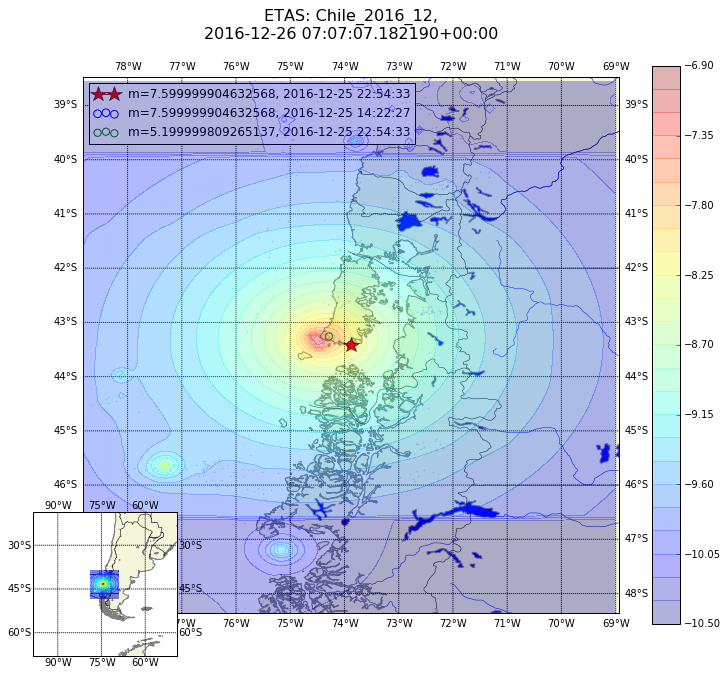

In [7]:
## TODO: do we need this? we run this figure again below...
# ... not really, but we do a bunch of variable definitions here, so...
#
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)
#
#mainshock = sorted(etas.catalog, key=lambda rw: rw['mag'])[-1]
#print('mainshock: ', mainshock)
# get mainshock. it's an m>6 event in the last week or so... this is subjective.
# if we just look for the biggest event, we get the L'Aquila event, so we'll need to be more creative...
# or just specify it.

mainshock = etas.catalog[-1]
for j,eq in enumerate(reversed(etas.catalog)):
    #print('*** ', pytz.utc.localize(eq['event_date'].astype(dtm.datetime)))
    if pytz.utc.localize(eq['event_date'].astype(dtm.datetime))<etas.t_now-dtm.timedelta(days=180): break
    if eq['mag']>mainshock['mag']:
        mainshock = eq
        #
    #
#
print('ms: ', mainshock, mainshock['lon'], mainshock['lat'])
x,y = etas.cm(mainshock['lon'], mainshock['lat'])
#
#print('mm: ', max(etas.catalog['mag']))
#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.0
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>to_dt-dtm.timedelta(days=180)]
#
# plot mainshock:
dt = mainshock['event_date'].astype(dtm.datetime)
dt=t0
dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
#etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
#                   label='m={}, {}'.format(mainshock['mag'], dt_str))
#etas.cm.plot([lon0], [lat0], latlon=False, marker='*', color='r', ms=16, zorder=11,
#                   label='m={}, *{}*'.format(m0, dt_str))
#
ax.set_title('ETAS: {},\n{}\n\n'.format(event_name, etas.t_now), size=16)
for j,m6 in enumerate(m6s):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, 
                          c='none', marker='o', zorder=11, label='m={}, {}'.format(m6['mag'], dt_str))
    #
#
#
etas.cm.scatter(etas.catalog['lon'], etas.catalog['lat'], s=2., edgecolors='b', c='b', marker='.', zorder=6, alpha=.15)
etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={:.3f}, {}'.format(mainshock['mag'], dt_str))

plt.gca().legend(loc='upper left')
#
# do an inset:
ax_inset = fg.add_axes([.05, .08, .2, .2])
d_lon_map = etas.cm.lonmax - etas.cm.lonmin
d_lat_map = etas.cm.latmax - etas.cm.latmin
d_ll_factor = 2.
lons_inset = [etas.cm.lonmin-d_ll_factor*d_lon_map, etas.cm.lonmax+d_ll_factor*d_lon_map]
lats_inset = [etas.cm.latmin-d_ll_factor*d_lat_map, etas.cm.latmax+d_ll_factor*d_lat_map]
#
cm_fc = etas.make_etas_contour_map(ax=ax_inset, fig_size=(10,8), n_contours=25, lons_map=lons_inset,
                                    lats_map=lats_inset, lon_interval=15, lat_interval=15, do_colorbar=False,
                                    do_states=False, do_rivers=False, lake_color=None)



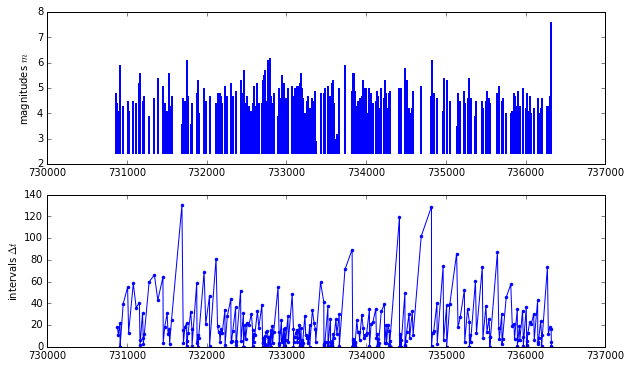

In [9]:
plt.figure(figsize=(10,6))
plt.clf()
ax1 = plt.subplot('211')
ax2 = plt.subplot('212', sharex=ax1)
#ax1.plot(etas.catalog['event_date'], etas.catalog['mag'], marker='.', ls='-', label='mag')
f_dates = [mpd.date2num(x.astype(dtm.datetime)) for x in etas.catalog['event_date']]
ax1.vlines(f_dates, (min(etas.catalog['mag'])-.5)*numpy.ones(len(etas.catalog)), 
           etas.catalog['mag'], lw=2., label='mag', color='b')
ax2.plot(f_dates[1:], numpy.diff(f_dates,1), '.-')

ax2.set_ylabel('intervals $\Delta t$')
ax1.set_ylabel('magnitudes $m$')

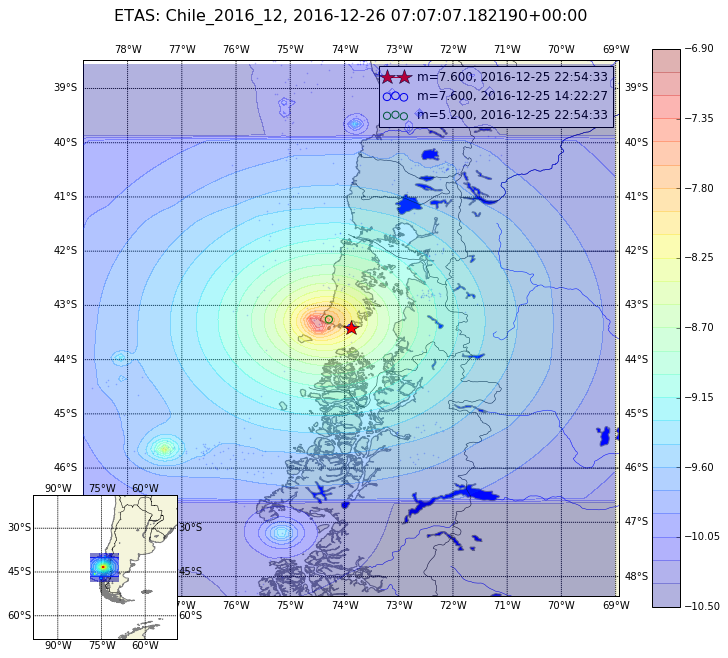

In [18]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)

#
#
# plot mainshock:
dt = mainshock['event_date'].astype(dtm.datetime)
etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={:.3f}, {}'.format(mainshock['mag'], dt_str))
ax.set_title('ETAS: {}, {}\n\n'.format(event_name, etas.t_now), size=16)
for j,m6 in enumerate(m6s):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, 
                          c='none', marker='o', zorder=11, label='m={:.3f}, {}'.format(m6['mag'], dt_str))
    #


etas.cm.scatter(etas.catalog['lon'], etas.catalog['lat'], s=2., edgecolors='b', c='b', marker='.', zorder=4, alpha=.2)
plt.gca().legend(loc='upper right')

# do an inset:
ax_inset = fg.add_axes([.05, .08, .2, .2])
d_lon_map = etas.cm.lonmax - etas.cm.lonmin
d_lat_map = etas.cm.latmax - etas.cm.latmin
d_ll_factor = 2.
lons_inset = [etas.cm.lonmin-d_ll_factor*d_lon_map, etas.cm.lonmax+d_ll_factor*d_lon_map]
lats_inset = [etas.cm.latmin-d_ll_factor*d_lat_map, etas.cm.latmax+d_ll_factor*d_lat_map]
#
cm_fc = etas.make_etas_contour_map(ax=ax_inset, fig_size=(10,8), n_contours=25, lons_map=lons_inset,
                                    lats_map=lats_inset, lon_interval=15, lat_interval=15, do_colorbar=False,
                                    do_states=False, do_rivers=False, lake_color=None)


In [19]:
## hey, pickling works with the new ETAS objects (or at least it appears to...):
# with open('data/etas_201610.pkl', 'wb') as fpkl:
#     pickle.dump( etas, fpkl)    
#
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas2 = pickle.load(fin)
#
#print(etas2.catalog[0:5])
# TODO: we want the datetime part of the filename to come from the etas object itself, for purposes of
# integrity. BUT, we want this script to be a bit more portable, so we should replace all the etas
# references/object name to just 'etas'
#
etas.export_kml(os.path.join(f_path, '{}_{}.kml'.format(f_root, str(etas.t_now).replace(' ', '_'))), 
                kml_contours_bottom=.25, kml_contours_top=1.0)
etas.export_xyz(os.path.join(f_path, '{}_{}.xyz'.format(f_root, str(etas.t_now).replace(' ', '_'))))
fg.savefig(os.path.join(f_path, '{}_{}.png'.format(f_root, str(etas.t_now).replace(' ', '_'))))

with open (os.path.join(f_path, '{}_{}.pkl'.format(f_root, str(etas.t_now).replace(' ', '_'))), 'wb') as fpkl:
    pickle.dump(etas, fpkl)


kml bottom, top:  6 24


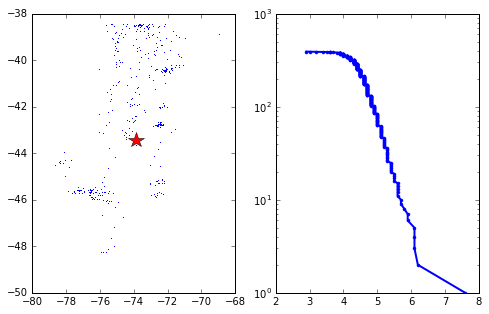

In [12]:
plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(etas.catalog['lon'], etas.catalog['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(etas.catalog['mag']))], numpy.arange(1,len(etas.catalog)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

In [13]:
#print(etas.mc, etas.mc_etas)

In [14]:
# plot a cross-section of ETAS. let's get smart about this and do a PCA on the xyz field...
#
#plt.figure()
##my_xy = [[x,y,z] for x,y in zip(etas.catalog['lon'], etas['lat']) if x>=42.25 and x<=42.75]
#my_xyz = [[x,y,z] for x,y,z in etas.ETAS_array if y>=42.25 and y<=42.75]
#plt.figure(figsize=(8,6))
#plt.plot([x for x,y,z in my_xyz ], [z for x,y,z in my_xyz], '.')

In [15]:
mycat = atp.catfromANSS(lon=lons, lat=lats, minMag=2.5,
                        dates0=[dtm.datetime(2005,1,1, tzinfo=tzutc), None], Nmax=None, fout=None, rec_array=True)


data handle fetched...
 no file.


data handle fetched...
 no file.
[ (datetime.datetime(2016, 12, 25, 14, 22, 27, 620000), -43.4164, -73.8803, 7.6, 34.59, 736323.5989307871)
 (datetime.datetime(2016, 12, 25, 21, 55, 57, 80000), -43.4335, -74.4693, 4.1, 10.92, 736323.9138550926)
 (datetime.datetime(2016, 12, 25, 22, 54, 33, 290000), -43.2583, -74.2879, 5.2, 5.71, 736323.9545519676)
 (datetime.datetime(2016, 12, 26, 0, 12, 28, 450000), -43.2653, -74.5653, 4.2, 11.48, 736324.0086626158)
 (datetime.datetime(2016, 12, 26, 0, 43, 29, 80000), -43.334, -74.4714, 4.1, 22.0, 736324.0301976852)]
2016-12-25T18:43:29.080000-0600


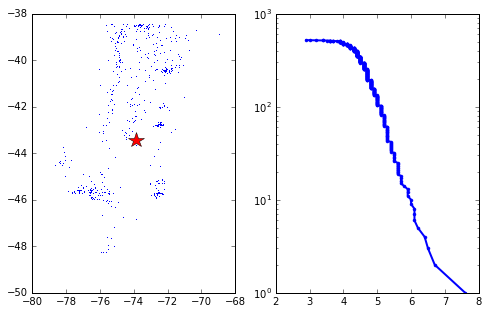

In [16]:
test_cat = atp.catfromANSS(lat=lats, lon=lons, minMag=1.5,
                           dates0=[dtm.datetime(1990,1,1, tzinfo=pytz.utc), dtm.datetime.now(pytz.utc)])


plt.figure()
plt.clf()
#plt.plot(test_cat['lon'], test_cat['lat'], '.')
print(test_cat[-5:])
print(max(test_cat['event_date']))

plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(test_cat['lon'], test_cat['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(test_cat['mag']))], numpy.arange(1,len(test_cat)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

In [17]:
for rw in etas.catalog:
    if rw['mag']>6.2: print(rw)

(datetime.datetime(2016, 12, 25, 14, 22, 27, 620), -43.41640090942383, -73.88030242919922, 7.599999904632568, 34.59000015258789, 736323.5989236183, 109.64780757544769, 16343.562787581432, 1.242672601574729e-07, 33.11310851257825, 2946.268908187585, 3.573327791517221e-05, 1.0, 1.1, 1.5, array([ 2.05501946,  8.55653084]), array([[-0.91577952, -0.4016813 ],
       [ 0.4016813 , -0.91577952]]), 80.0)
